In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

pd.set_option('max_column', 100)

In [3]:
raw_path = '../../dataset/raw/'
mst_path = '../../dataset/mst/'

In [4]:
os.listdir(mst_path)

['Participant_Survey.csv', 'question_lookup.csv']

In [6]:
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

,respondent_id,collector_id,start_date,end_date,ip_address,email_address,first_name,last_name,custom_data_1,"what_brand/type_of_e-bike_did_you_buy_(e.g.,_sonders_x)?",how_much_did_your_e-bike_cost_(before_the_rebate)?,"overall,_how_satisfied_are_you_with_your_e-bike?","why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?",how_much_did_the_$700_rebate_influence_your_decision_to_purchase_an_e-bike?,how_far_is_your_average_trip_by_e-bike?,for_what_purpose_aremost_of_your_e-bike_rides?,business/work_use,injury_or_disability,sustainability_/_environmental_benefits,cargo_hauling,recreation_or_exercise,transport_children,save_money_/_reducetransportation_costs,hills,other_(please_specify),"social_media_(e.g.,_facebook,_instagram,_twitter)",news_article,bikesgv_listserve/email,friend/family/colleague,flyer,poster,other_(please_specify).1,how_familiar_were_you_with_e-bikes_before_hearing_about_this_rebate_program?,bicycle_(regular),electric_bicycle_(e-bike),working_motor_vehicle,scooter,motorcycle,none_of_the_above,walked,biked,skated_/_scooted,used_public_transit,carpooled_/_rode_as_a_passenger,used_ride_share_service_(lyft/uber),drove_car_/_motorcycle,walked.1,biked.1,skated_/_scooted.1,used_public_transit.1,carpooled_/_rode_as_a_passenger.1,used_ride_share_service_(lyft/uber).1,drove_car_/_motorcycle.1,how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?,how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?,do_you_use_your_e-bike_for_some_trips_that_you_used_to_take_by_car?,"have_youused_your_e-bikeon_a_river_path_or_‘greenway’_in_the_past_12_months?_(e.g.,_san_gabriel_river_or_rio_hondo_river_trails)",how_easy_or_difficult_is_it_to_bicycle_in_your_community?,did_your_level_of_comfort_riding_a_bicycle_in_traffic_increase_after_taking_the_city_cycling_class?,off-street_greenways_/_multi-use_paths,on-street_separated_/_physically_‘protected’_bikeways,buffered_bike_lanes,color_painted_bike_lanes,striped_bike_lanes,"bike_routes_(signage,_sharrows)",how_safe_doyou_feel_riding_a_bicycle_in_traffic?,"what_barriers_to_using_your_e-bike_have_you_encountered_thus_far,_if_any?",how_many_members_of_your_household_use_your_e-bike_at_least_once_a_month?,response,other_(please_specify).2,would_you_like_to_see_future_e-bike_rebate_programs?,should_future_programsexpand_the_list_of_eligible_light_electric_vehicles_to_include_electric-scooters_and_similar_micro-mobility_devices?,"other_suggestions,_feedback,_or_comments_forproject_organizers.",community_of_residence,zip_code,number_of_persons_in_household,household_income,what_is_your_age_group?,electric_car,electric_motorcycle,electric_scooter,electric_skateboard,electric_wheel,"no,_i_do_not_own_other_evs",other_(please_specify).3,american_indian_or_alaska_native,asian/pacific_islander,black_or_african_american,hispanic_or_latino,white,multi-ethnic,decline_to_state,other_(please_specify).4,female,male,decline_to_state.1,other
0,6.949403e+09,169864446.0,2018-10-15 10:08:23,2018-10-15 10:13:24,12.9.23.93,NaN,NaN,NaN,NaN,Haibike,"$2,001 - $2,500",Extremely satisfied,My e-bike allows me to keep up with others and...,A lot,8-10 miles,Recreation / Leisure,Business/Work Use,NaN,Sustainability / Environmental Benefits,NaN,Recreation or Exercise,NaN,NaN,Hills,NaN,NaN,NaN,BikeSGV listserve/email,NaN,NaN,NaN,NaN,Somewhat familiar,NaN,Electric Bicycle (E-bike),Working motor vehicle,Scooter,NaN,NaN,Walked,NaN,NaN,Used public transit,NaN,NaN,Drove car / motorcycle,NaN,Biked,NaN,Used public transit,NaN,NaN,Drove car / motorcycle,1-11 times a year,1-2 days a week,Yes,Yes,Somewhat easy,Yes,Somewhat safe,Somewhat safe,Somewhat safe,Somewhat safe,Somewhat safe,Somewhat safe,Somewhat safe,It's a little heavy. So it is hard for me to c...,0,1,NaN,Yes,Yes,The rebate process was slow and communication ...,el Monte,91731.0,2,"$75,000-$99,999",36 - 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic or Latino,NaN,NaN,NaN,NaN,Female,NaN,N

In [11]:
#num_cols = ['walked','biked','skated_/_scooted','used_public_transit','carpooled_/_rode_as_a_passenger','used_ride_share_service_(lyft/uber)','drove_car_/_motorcycle']
num_cols = list(df.columns[39:53])
print(num_cols)


['walked', 'biked', 'skated_/_scooted', 'used_public_transit', 'carpooled_/_rode_as_a_passenger', 'used_ride_share_service_(lyft/uber)', 'drove_car_/_motorcycle', 'walked.1', 'biked.1', 'skated_/_scooted.1', 'used_public_transit.1', 'carpooled_/_rode_as_a_passenger.1', 'used_ride_share_service_(lyft/uber).1', 'drove_car_/_motorcycle.1']


In [60]:
res = pd.DataFrame()
res = res.reset_index()
row_num = df[num_cols[0]].size

count = []
for col in num_cols:
    count.append(row_num - df[col].isnull().sum())
res['mode_of_transport'] = num_cols
res['total_count'] = count
print(res)

[16, 18, 2, 10, 5, 4, 29, 11, 27, 2, 9, 3, 3, 26]
0                                    walked
1                                     biked
2                          skated_/_scooted
3                       used_public_transit
4           carpooled_/_rode_as_a_passenger
5       used_ride_share_service_(lyft/uber)
6                    drove_car_/_motorcycle
7                                  walked.1
8                                   biked.1
9                        skated_/_scooted.1
10                    used_public_transit.1
11        carpooled_/_rode_as_a_passenger.1
12    used_ride_share_service_(lyft/uber).1
13                 drove_car_/_motorcycle.1
Name: mode_of_transport, dtype: object
   index                      mode_of_transport  total_count
0    NaN                                 walked           16
1    NaN                                  biked           18
2    NaN                       skated_/_scooted            2
3    NaN                    used_public_transit    

                    mode_of_transport  total_count
1                               biked           18
8                             biked.1           27
4     carpooled_/_rode_as_a_passenger            5
11  carpooled_/_rode_as_a_passenger.1            3
6              drove_car_/_motorcycle           29
13           drove_car_/_motorcycle.1           26
2                    skated_/_scooted            2
9                  skated_/_scooted.1            2
3                 used_public_transit           10
10              used_public_transit.1            9


NameError: name 'fig_path' is not defined

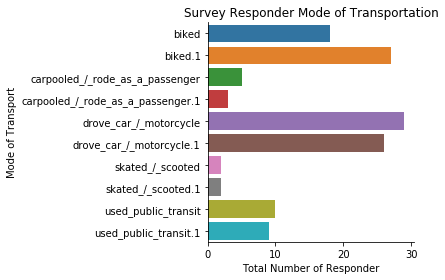

In [65]:
temp = res.sort_values('mode_of_transport', ascending = True)[['mode_of_transport', 'total_count']].head(10)
print(temp)

sns.barplot(data = temp, y = 'mode_of_transport', x = 'total_count', orient = "h")
sns.despine()
plt.ylabel('Mode of Transport')
plt.xlabel('Total Number of Responder')
plt.title('Survey Responder Mode of Transportation')
plt.tight_layout()
plt.savefig(fig_path + 'total_peds', fmt = 'png', dpi = 300)
plt.show()